# Chapter 8 : Vapour Power Systems

* Michael J . Mora. Fundamentals of Engineering Thermodynamics(7th Edition). John Wiley & Sons, Inc. 2011


## Example 8.1:Analyzing an Ideal Rankine Cycle Page 438

Steam is the working fluid in an ideal Rankine cycle. 

Saturated vapor enters the turbine at 8.0 MPa and saturated liquid exits the condenser at a pressure of 0.008 MPa. 

The net power output of the cycle is 100 MW.

<img src="./img/vps-fig81.png"/> 


* **Process 1–2:** **Isentropic expansion** of the working fluid through the turbine from saturated vapor at state 1 to the condenser pressure.
* **Process 2–3:** Heat transfer from the working fluid as it flows at **constant pressure**
through the condenser with saturated liquid at state 3.
* **Process 3–4:** **Isentropic compression** in the pump to state 4 in the compressed liquid region.
* **Process 4–1:** Heat transfer to the working fluid as it flows at **constant pressure** through the boiler to complete the cycle.


Determine for the cycle

(a) the thermal efficiency,

(b) the back work ratio, 

(c) the mass flow rate of the steam,in kg/h,

(d) the rate of heat transfer, Qin, into the working fluid as it passes through the boiler, in MW,

(e) the rate of heat transfer, Qout, from the condensing steam as it passes through the condenser, in MW,

(f) the mass flow rate of the condenser cooling water, in kg/h, if cooling water enters the condenser at 15C and exits at 35C.


### Engineering Model:

* 1 Each component of the cycle is analyzed as a control volume at steady state. The control volumes are shown on the accompanying sketch by dashed lines.
* 2 All processes of the working fluid are internally reversible.
* 3 The turbine and pump operate adiabatically.
* 4 Kinetic and potential energy effects are negligible.
* 5 Saturated vapor enters the turbine. Condensate exits the condenser as saturated liquid.

## Analysis:

To begin the analysis, we fix each of **the principal states（1，2，3，4)** located on the accompanying schematic and **T–s** diagrams.

In [2]:
from seuif97 import *

# Given:-
p1 = 8.0               #  in MPa
p3 = 0.008             # pressure of saturated liquid exiting the condenser in MPa
Wcycledot = 100.00     # the net power output of the cycle in MW

# Analysis

# State  1
h1=px2h(p1,1)          # h1 = 2758.0    From table A-3  kj/kg
s1=px2s(p1,1)          # s1 = 5.7432    From table A-3  kj/kg.k

# State  2
s2 = s1

# quality at state 2
sf=px2s(p3,0)         # sf = 0.5926   kj/kg.k
sg=px2s(p3,1)         # sg = 8.2287   kj/kg.k
x2=(s2-sf)/(sg-sf)

hf=px2h(p3,0)         # hf = 173.88    kj/kg
hg=px2h(p3,1)         
h2 = hf + x2*(hg-hf)      #  hfg = 2403.1   kj/kg

# State 3 is saturated liquid at 0.008 MPa, so
h3 = hf                                         #  kj/kg
v3 =px2v(p3,0)                #1.0084e-3  m^3/kg

#State 4 
p4 = p1
h4 = h3 + v3*(p4-p3)*10**6*10**-3    # kj/kg

### (a) The thermal efficiency

The net power developed by the cycle is

$\dot{W}_{cycle}=\dot{W}_t-\dot{W}_p$

Mass and energy rate balances for control volumes around the turbine and pump give,respectively

$\frac{\dot{W}_t}{\dot{m}}=h_1-h_2$  
$\frac{\dot{W}_p}{\dot{m}}=h_4-h_3$

where $\dot{m}$ is the mass flow rate of the steam. The rate of heat transfer to the working fluid as it passes through the boiler is determined using mass and energy rate balances as

$\frac{\dot{Q}_{in}}{\dot{m}}=h_1-h_4$

The thermal efficiency is then


$\eta=\frac{\dot{W}_t-\dot{W}_p}{\dot{Q}_{in}}=\frac{(h_1-h_2)-(h_4-h_3)}{h_1-h_4}$


In [3]:
# Part(a)
# Mass and energy rate balances for control volumes 
# around the turbine and pump give, respectively

# turbine
wtdot = h1 - h2
# pump
wpdot = h4-h3

# The rate of heat transfer to the working fluid as it passes 
# through the boiler is determined using mass and energy rate balances as
qindot = h1-h4

# thermal efficiency
eta = (wtdot-wpdot)/qindot   

# Result for part a
print('(a) The thermal efficiency for the cycle is ',round(eta,3))

(a) The thermal efficiency for the cycle is  0.371


In [16]:
# Part(b)
# back work ratio：bwr, defined as the ratio of the pump work input to the work 
# developed by the turbine.
bwr = wpdot/wtdot                                    # 

# Result
print('(b) The back work ratio is ',round(bwr,3)*100,'%')

# Part(c)
mdot = (Wcycledot*10**3*3600)/((h1-h2)-(h4-h3))       # mass flow rate in kg/h

# Result 
print('(c) The mass flow rate of the steam is',round(mdot,2),'kg/h.')
 
# Part(d)
Qindot = mdot*qindot/(3600*10**3)                     # in MW

# Results
print('(d) The rate of heat transfer Qindot into the working fluid as'+
      ' it passes through the boiler is',round(Qindot,2),'MW.')

# Part(e)
Qoutdot = mdot*(h2-h3)/(3600*10**3)                   # in MW

# Results
print('(e) The rate of heat transfer Qoutdot from the condensing steam '+
      'as it passes through the condenser is {:.2f} MW.'.format(Qoutdot))

# Part(f)
# Given: 
tcwin=15
tcwout=35

hcwout=tx2h(tcwout,0)   # From table A-2,hcwout= 146.68  kj/kg  

hcwin= tx2h(tcwin,0)    # hcwin 62.99  
mcwdot= (Qoutdot*10**3*3600)/(hcwout-hcwin)          # in kg/h

# Results
print('(f) The mass flow rate of the condenser cooling water is %.2f kg/h.'%mcwdot )

(b) The back work ratio is  0.8 %
(c) The mass flow rate of the steam is 376776.21 kg/h.
(d) The rate of heat transfer Qindot into the working fluid as it passes through the boiler is 269.68 MW.
(e) The rate of heat transfer Qoutdot from the condensing steam as it passes through the condenser is 169.68 MW.
(f) The mass flow rate of the condenser cooling water is 7301347.42 kg/h.


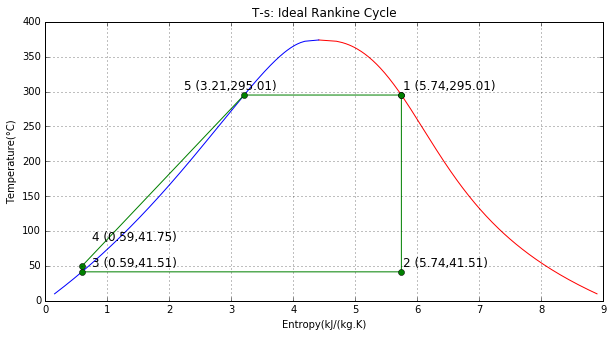

In [86]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

#plt.figure()
plt.figure(figsize=(10.0,5.0))

# saturated vapor and liquid entropy lines 
npt = np.linspace(10,647.096-273.15,200) # range of temperatures
svap = [s for s in [tx2s(t, 1) for t in npt]]
sliq = [s for s in [tx2s(t, 0) for t in npt]]
plt.plot(svap, npt, 'r-')
plt.plot(sliq, npt, 'b-')

# Rankine T-S
t1=px2t(p1,1)
t2=px2t(p3,0)

t3=t2
s3=tx2s(t3,0)

s4=s3
t4=ps2t(p4,s4) 
# t4稍高于t3，直接绘图3，4点几乎重叠,
# 调整t4为显示虚拟值，消除重叠，定性反映热力过程
t4=t4+8

t5=px2t(p1,0)
s5=px2s(p1,0)

tt=[t1,t2,t3,t4,t5,t1] 
ss=[s1,s2,s3,s4,s5,s1]

plt.plot(ss, tt, 'go-')

plt.annotate('1 ({:.2f},{:.2f})'.format(s1,t1),
             xy=(s1, t1), xycoords='data',
             xytext=(+2, +5), textcoords='offset points', fontsize=12)

plt.annotate('2 ({:.2f},{:.2f})'.format(s2,t2),
             xy=(s2, t2), xycoords='data',
             xytext=(+2, +5), textcoords='offset points', fontsize=12)

plt.annotate('3 ({:.2f},{:.2f})'.format(s3,t3),
             xy=(s3, t3), xycoords='data',
             xytext=(+10, +5), textcoords='offset points', fontsize=12)

plt.annotate('4 ({:.2f},{:.2f})'.format(s4,t4-8),
             xy=(s4, t4), xycoords='data',
             xytext=(+10, +25), textcoords='offset points', fontsize=12)


plt.annotate('5 ({:.2f},{:.2f})'.format(s5,t5),
             xy=(s5, t5), xycoords='data',
             xytext=(-60, +5), textcoords='offset points', fontsize=12)

plt.title('T-s: Ideal Rankine Cycle')
plt.xlabel('Entropy(kJ/(kg.K)')
plt.ylabel('Temperature(°C)')
plt.grid()
plt.show()

# Modeling and Simulation of Industrial Process

* **Algorithms + Data Structures = Programs**

  is a 1976 book written by **Niklaus Wirth** covering some of the fundamental topics of computer programming, particularly that algorithms and data structures are inherently related. 

https://en.wikipedia.org/wiki/Algorithms_%2B_Data_Structures_%3D_Programs

The Turbo Pascal compiler written by **Anders Hejlsberg** was largely inspired by the "Tiny Pascal" compiler in **Niklaus Wirth**'s book.

## Data Structures+ Algorithms = Programs


The ideal rankine cycle:
```
   
    ----Node 0---Turbine---Node 1----
    |                               |
  Boiler                          Condenser
    |                               |
    ----Node 3---Pump------Node 2---- 
```

Objects in the ideal rankine cycle：

* Node

* Boiler，Turbine，Condenser，Pump


In [ ]:
import seuif97 as if97

class Node(object):

    def __init__(self):
        self.p = None
        self.t = None
        self.h = None
        self.s = None
        self.v = None
        self.x = None

    def pt(self):
        self.h = if97.pt2h(self.p, self.t)
        self.s = if97.pt2s(self.p, self.t)
        self.v = if97.pt2v(self.p, self.t)
        self.x = None

    def ph(self):
        self.t = if97.ph2t(self.p, self.h)
        self.s = if97.ph2s(self.p, self.h)
        self.v = if97.ph2v(self.p, self.h)
        self.x = if97.ph2x(self.p, self.h)

    def ps(self):
        self.t = if97.ps2t(self.p, self.s)
        self.h = if97.ps2h(self.p, self.s)
        self.v = if97.ps2v(self.p, self.s)
        self.x = if97.ps2x(self.p, self.s)

    def hs(self):
        self.t = if97.hs2t(self.h, self.s)
        self.p = if97.hs2p(self.h, self.s)
        self.v = if97.hs2v(self.h, self.s)
        self.x = if97.hs2x(self.h, self.s)

    def px(self):
        self.t = if97.px2t(self.p, self.x)
        self.h = if97.px2h(self.p, self.x)
        self.s = if97.px2s(self.p, self.x)
        self.v = if97.px2v(self.p, self.x)

    def tx(self):
        self.p = if97.tx2p(self.t, self.x)
        self.h = if97.tx2h(self.t, self.x)
        self.s = if97.tx2s(self.t, self.x)
        self.v = if97.tx2v(self.t, self.x)


In [ ]:
class Boiler:
    """
    The boiler class
    """

    def __init__(self,inletNode, exitNode):
        """
        Initializes the boiler with nodes
        """
        self.inletNode = inletNode
        self.exitNode = exitNode

    def simulate(self,nodes,mdot):
        """
        Simulates the Boiler and tries to get the exit temperature down
        to the desiredOutletTemp. This is done by continuously adding h
        while keeping the P constant.
        """
        self.heatAdded = nodes[self.exitNode].h - nodes[self.inletNode].h
        self.Qindot = mdot*self.heatAdded/(3600*1000)   

In [ ]:
class Turbine():

    """
    Turbine class

    Represents a turbine in the Rankine cycle
    """

    def __init__(self, inletNode,exitNode):
        """
        Initializes the turbine with nodes
        """
        self.inletNode = inletNode
        self.exitNode=exitNode
    
    def simulate(self,nodes):
        """
        Simulates the turbine 
        """
        nodes[self.exitNode].s=nodes[self.inletNode].s
        nodes[self.exitNode].ps()
      
        self.workExtracted = nodes[self.inletNode].h- nodes[self.exitNode].h 


In [ ]:
class Pump():

    """
    Pump class

    Represents a pump in the Rankine cycle
    """

    def __init__(self,inletNode, exitNode):
        """
        Initializes the pump with nodes
        """
        self.inletNode = inletNode
        self.exitNode = exitNode

    def simulate(self,nodes):
        """
        Simulates the pump 
        """
        nodes[self.exitNode].s = nodes[self.inletNode].s
        nodes[self.exitNode].h=nodes[self.inletNode].h+nodes[self.inletNode].v*(nodes[self.exitNode].p-nodes[self.inletNode].p)*1000
        nodes[self.exitNode].hs()
    
        self.workRequired = nodes[self.exitNode].h - nodes[self.inletNode].h


In [ ]:
class Condenser:
    """
    The Condenser class
    """

    def __init__(self,inletNode, exitNode, inletNodeW,exitNodeW):
        """
        Initializes the condenser with nodes
        """
        self.inletNode = inletNode
        self.exitNode = exitNode
        self.inletNodeW = inletNodeW
        self.exitNodeW = exitNodeW

    def simulate(self,nodes,nodew,mdot):
        """
        Simulates the Condenser 
        """
        self.heatExtracted = nodes[self.inletNode].h - nodes[self.exitNode].h
        self.Qoutdot = mdot* self.heatExtracted /(3600*1000) 
        self.mcwdot= (self.Qoutdot*1000*3600)/(nodew[self.exitNodeW].h-nodew[self.inletNodeW].h) 


In [ ]:
"""
PyRankine is a simple simulator of the ideal rankine cycle as 
   
    ----Node 0---Turbine---Node 1----
    |                               |
  Boiler                          Condenser
    |                               |
    ----Node 3---Pump------Node 2---- 

"""

def RankineCycle():
    boilerPressure = 8.0
    condenserPressure = 0.008
    Wcycledot = 100.00

    # 1 init nodes
    nodes = []
    for i in range(4):
        nodes.append(Node())

    nodes[0].p = boilerPressure
    nodes[0].x = 1

    nodes[1].p = condenserPressure

    nodes[2].p = condenserPressure
    nodes[2].x = 0

    nodes[3].p = boilerPressure

    nodes[0].px()
    nodes[2].px()

    # 2 connect device
    t = Turbine(0, 1)
    p = Pump(2, 3)
    b = Boiler(3, 0)

    # 3 simulate
    t.simulate(nodes)
    p.simulate(nodes)

    bwr = p.workRequired / t.workExtracted
    mdot = Wcycledot * 1000.0* 3600.0 / (t.workExtracted - p.workRequired)

    b.simulate(nodes, mdot)                  # in MW
    efficiency = (t.workExtracted - p.workRequired) / \
        (b.heatAdded)                # in MW

   # 4 condenser
    nodew = []
    for i in range(2):
        nodew.append(Node())

    nodew[0].t = 15
    nodew[0].x = 0
    nodew[1].t = 35
    nodew[1].x = 0
    nodew[0].tx()
    nodew[1].tx()

    c =Condenser(1, 2, 0, 1)
    c.simulate(nodes, nodew, mdot)

    print("Boiler Pressure: ", boilerPressure, "MPa")
    print("Condenser Pressure: ", condenserPressure, "MPa")
    print("The net power output of the cycle: ", Wcycledot, "MW")
    print("Cooling water enters the condenser T", nodew[0].t, "C")
    print("Cooling water exits  the condenser T", nodew[1].t, "C")
    print(" \n --------------------------------------------------")
    print("Efficiency: ", '%.2f' % (efficiency * 100), "%")
    print("The back work ratio: ", '%.2f' % (bwr * 100), "%")
    print("The mass flow rate: ",  '%.2f' % mdot, "%")
    print('The rate of heat transfer as the fluid passes the boiler: ',
          '%.2f' % b.Qindot, 'MW')
    print('The rate of heat transfer from the condensing steam: ',
          '%.2f' % c.Qoutdot, 'MW')
    print('The mass flow rate of the condenser cooling water: ', '%.2f' %
          c.mcwdot, 'kg/h')


if __name__ == '__main__':
    RankineCycle()


## Reference

* R Sinha, Christiaan J. J. Paredis. etc. Modeling and Simulation Methods for Design of Engineering Systems. Transactions of the ASME[J]. 2001.03(1):84-91

* ASCEND4: The ASCEND Modelling and Simulation Environment  http://ascend4.org/ 

* OpenMDAO: An open-source MDAO framework written in Python  http://openmdao.org/

* OpenModelica: An open-source Modelica-based modeling and simulation environment https://openmodelica.org/

* Jeffrey Kantor: Introduction to Chemical Engineering Analysis https://github.com/jckantor/CBE20255

